# COVID-19 CONFIRMED CASES FOR NIGERIA & GHANA AS AT MAY 9, 2020

### Introduction
The COVID-19 pandemic disrupted our world in unimaginable ways. Its spread has led to loss of loved ones, livelihood, and worsened the raging mental health crisis. The cumulative count of confirmed cases by day and country was downloaded from the John Hopkins website.
This analysis was carried out just as the lockdown was being relaxed in my state of residence: Delta, Nigeria. I restricted my analysis to the last 60 days from May 9, and set out to answer the following questions about COVID-19 in Nigeria and Ghana:
- In the last 60 days, on which days were the highest number of new cases recorded?
- Are new cases more likely to be announced on a particular day of the week?

### Importing Relevant Libraries

In [1]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt

## SECTION A: Data Preparation

### Getting the Global Statistics

In [2]:
world_data = pd.read_csv(r"C:\Users\Engr S A\Desktop\Portfolio Projects\time_series_covid19_confirmed_global.csv", index_col=1)
world_data.index.name = None
world_data.head(3)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558


### Extracting Nigeria and Ghana Figures

In [3]:
gh_and_ng = world_data.iloc[[121,173],3:].transpose()
gh_and_ng.reset_index(level=0, inplace=True)
gh_and_ng.rename({"index":"Date"}, axis=1, inplace=True)
gh_and_ng

,Date,Ghana,Nigeria
0,1/22/20,0,0
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0
...,...,...,...
104,5/5/20,2719,2950
105,5/6/20,3091,3145
106,5/7/20,3091,3526
107,5/8/20,4012,3912


### Selecting Last 60 Days and Formatting Date

In [4]:
data = gh_and_ng.iloc[-60:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 49 to 108
Data columns (total 3 columns):
Date       60 non-null object
Ghana      60 non-null int64
Nigeria    60 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Day of the Week"] = data["Date"].dt.dayofweek
data["Day of the Week"] = data["Date"].dt.day_name()
data["Full Date"] = data["Date"].dt.strftime("%A, %B %d")
data.head(10)

C:\USER\Conda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\USER\Conda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\USER\Conda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

,Date,Ghana,Nigeria,Day of the Week,Full Date
49,2020-03-11,0,2,Wednesday,"Wednesday, March 11"
50,2020-03-12,0,2,Thursday,"Thursday, March 12"
51,2020-03-13,0,2,Friday,"Friday, March 13"
52,2020-03-14,3,2,Saturday,"Saturday, March 14"
53,2020-03-15,6,2,Sunday,"Sunday, March 15"
54,2020-03-16,6,2,Monday,"Monday, March 16"
55,2020-03-17,7,3,Tuesday,"Tuesday, March 17"
56,2020-03-18,7,8,Wednesday,"Wednesday, March 18"
57,2020-03-19,11,8,Thursday,"Thursday, March 19"
58,2020-03-20,16,12,Friday,"Friday, March 20"


In [6]:
data = data[["Date","Day of the Week","Full Date","Ghana", "Nigeria"]]
data.head(10)

,Date,Day of the Week,Full Date,Ghana,Nigeria
49,2020-03-11,Wednesday,"Wednesday, March 11",0,2
50,2020-03-12,Thursday,"Thursday, March 12",0,2
51,2020-03-13,Friday,"Friday, March 13",0,2
52,2020-03-14,Saturday,"Saturday, March 14",3,2
53,2020-03-15,Sunday,"Sunday, March 15",6,2
54,2020-03-16,Monday,"Monday, March 16",6,2
55,2020-03-17,Tuesday,"Tuesday, March 17",7,3
56,2020-03-18,Wednesday,"Wednesday, March 18",7,8
57,2020-03-19,Thursday,"Thursday, March 19",11,8
58,2020-03-20,Friday,"Friday, March 20",16,12


### Calculating New Cases in Ghana and Adding to Dataframe

In [7]:
gh_dif = []
for i in range(60):
    if i == 0:
        dif = data["Ghana"].iloc[i]
    else:
        dif = data["Ghana"].iloc[i] - data["Ghana"].iloc[i-1]
    gh_dif.append(dif)
data["Ghana New Cases"] = gh_dif
data.head(10)

,Date,Day of the Week,Full Date,Ghana,Nigeria,Ghana New Cases
49,2020-03-11,Wednesday,"Wednesday, March 11",0,2,0
50,2020-03-12,Thursday,"Thursday, March 12",0,2,0
51,2020-03-13,Friday,"Friday, March 13",0,2,0
52,2020-03-14,Saturday,"Saturday, March 14",3,2,3
53,2020-03-15,Sunday,"Sunday, March 15",6,2,3
54,2020-03-16,Monday,"Monday, March 16",6,2,0
55,2020-03-17,Tuesday,"Tuesday, March 17",7,3,1
56,2020-03-18,Wednesday,"Wednesday, March 18",7,8,0
57,2020-03-19,Thursday,"Thursday, March 19",11,8,4
58,2020-03-20,Friday,"Friday, March 20",16,12,5


### Calculating New Cases in Nigeria and Adding to Dataframe

In [8]:
ng_dif = []
for i in range(60):
    if i == 0:
        dif = data["Nigeria"].iloc[i]
    else:
        dif = data["Nigeria"].iloc[i] - data["Nigeria"].iloc[i-1]
    ng_dif.append(dif)
data["Nigeria New Cases"] = ng_dif
data.head(10)

,Date,Day of the Week,Full Date,Ghana,Nigeria,Ghana New Cases,Nigeria New Cases
49,2020-03-11,Wednesday,"Wednesday, March 11",0,2,0,2
50,2020-03-12,Thursday,"Thursday, March 12",0,2,0,0
51,2020-03-13,Friday,"Friday, March 13",0,2,0,0
52,2020-03-14,Saturday,"Saturday, March 14",3,2,3,0
53,2020-03-15,Sunday,"Sunday, March 15",6,2,3,0
54,2020-03-16,Monday,"Monday, March 16",6,2,0,0
55,2020-03-17,Tuesday,"Tuesday, March 17",7,3,1,1
56,2020-03-18,Wednesday,"Wednesday, March 18",7,8,0,5
57,2020-03-19,Thursday,"Thursday, March 19",11,8,4,0
58,2020-03-20,Friday,"Friday, March 20",16,12,5,4


## SECTION B: DATA ANALYSIS

### Which day of the week has the highest number of cases for Ghana?

In [9]:
data.groupby('Day of the Week').sum()['Ghana New Cases'].sort_values(ascending=False)

Day of the Week
Friday       1057
Sunday        664
Wednesday     584
Saturday      579
Monday        554
Thursday      525
Tuesday       300
Name: Ghana New Cases, dtype: int64

### Which day of the week has the highest number of cases for Nigeria?

In [10]:
data.groupby('Day of the Week').sum()['Nigeria New Cases'].sort_values(ascending=False)

Day of the Week
Friday       841
Thursday     764
Wednesday    708
Saturday     639
Monday       402
Sunday       399
Tuesday      398
Name: Nigeria New Cases, dtype: int64

For both countries, the highest number of new cases were recorded on Friday, and the lowest number on Tuesday.

### Covid-19 Progression for Ghana

C:\USER\Conda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


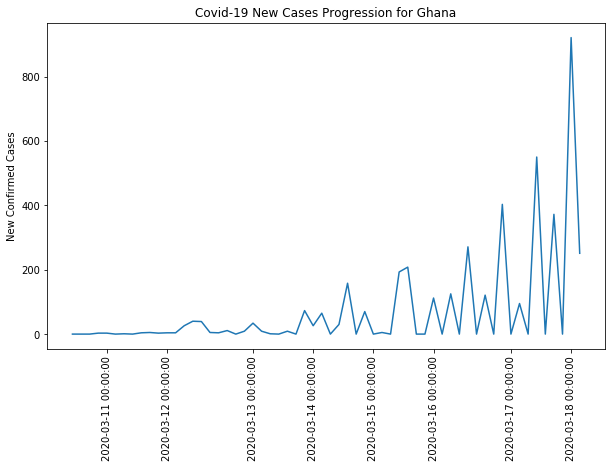

In [11]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(data["Date"],data["Ghana New Cases"])
ax1.set_xticklabels(data["Date"],rotation=90)
ax1.set_ylabel('New Confirmed Cases')
ax1.set_title('Covid-19 New Cases Progression for Ghana')

plt.show()

### Ghana's Top 10 Days

In [12]:
gh_top10_days = data.sort_values(by="Ghana New Cases",ascending=False)[:10]
gh_top10_days

,Date,Day of the Week,Full Date,Ghana,Nigeria,Ghana New Cases,Nigeria New Cases
107,2020-05-08,Friday,"Friday, May 08",4012,3912,921,386
103,2020-05-04,Monday,"Monday, May 04",2719,2802,550,244
99,2020-04-30,Thursday,"Thursday, April 30",2074,1932,403,204
105,2020-05-06,Wednesday,"Wednesday, May 06",3091,3145,372,195
95,2020-04-26,Sunday,"Sunday, April 26",1550,1273,271,91
108,2020-05-09,Saturday,"Saturday, May 09",4263,4151,251,239
88,2020-04-19,Sunday,"Sunday, April 19",1042,627,208,85
87,2020-04-18,Saturday,"Saturday, April 18",834,542,193,49
81,2020-04-12,Sunday,"Sunday, April 12",566,323,158,5
93,2020-04-24,Friday,"Friday, April 24",1279,1095,125,114


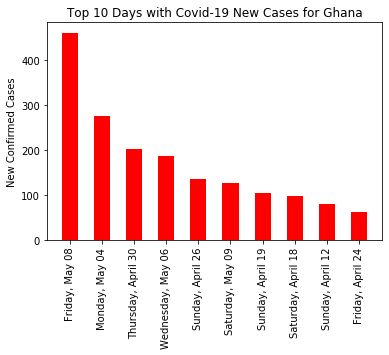

In [13]:
col = gh_top10_days["Full Date"]

bar_position = arange(10) + 1.0
bar_height = gh_top10_days["Ghana New Cases"].values

fig,ax = plt.subplots()
ax.bar(bar_position, bar_height, 0.5,color="red")

tick_positions = range(1,11)
ax.set_xticks(tick_positions)
ax.set_xticklabels(col,rotation=90)
ax.set_yticklabels(range(0,1100,100))

ax.set_title('Top 10 Days with Covid-19 New Cases for Ghana')
ax.set_ylabel('New Confirmed Cases')

plt.show()

### Covid-19 Progression for Nigeria

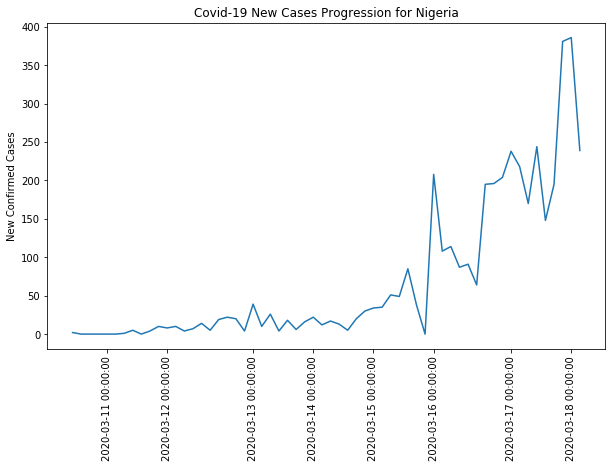

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(data["Date"],data["Nigeria New Cases"])
ax.set_xticklabels(data["Date"],rotation=90)
ax.set_ylabel('New Confirmed Cases')
ax.set_title('Covid-19 New Cases Progression for Nigeria')

plt.show()

### Nigeria's Top 10 Days

In [15]:
ng_top10_days = data.sort_values(by="Nigeria New Cases",ascending=False)[:10]
ng_top10_days

,Date,Day of the Week,Full Date,Ghana,Nigeria,Ghana New Cases,Nigeria New Cases
107,2020-05-08,Friday,"Friday, May 08",4012,3912,921,386
106,2020-05-07,Thursday,"Thursday, May 07",3091,3526,0,381
103,2020-05-04,Monday,"Monday, May 04",2719,2802,550,244
108,2020-05-09,Saturday,"Saturday, May 09",4263,4151,251,239
100,2020-05-01,Friday,"Friday, May 01",2074,2170,0,238
101,2020-05-02,Saturday,"Saturday, May 02",2169,2388,95,218
91,2020-04-22,Wednesday,"Wednesday, April 22",1154,873,112,208
99,2020-04-30,Thursday,"Thursday, April 30",2074,1932,403,204
98,2020-04-29,Wednesday,"Wednesday, April 29",1671,1728,0,196
105,2020-05-06,Wednesday,"Wednesday, May 06",3091,3145,372,195


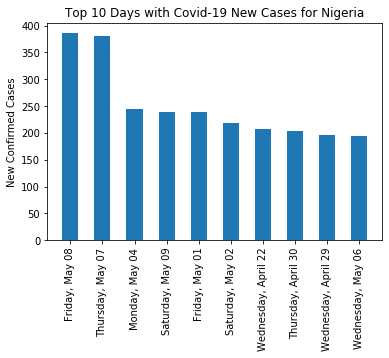

In [16]:
col = ng_top10_days["Full Date"]

bar_position = arange(10) + 1.0
bar_height = ng_top10_days["Nigeria New Cases"].values

fig,ax = plt.subplots()
ax.bar(bar_position, bar_height, 0.5)

tick_positions = range(1,11)
ax.set_xticks(tick_positions)
ax.set_xticklabels(col,rotation=90)
ax.set_yticklabels(range(0,450,50))

ax.set_title('Top 10 Days with Covid-19 New Cases for Nigeria')
ax.set_ylabel('New Confirmed Cases')

plt.show()

### Conclusion

For both countries, the highest number of new cases were recorded on Friday, and the lowest number on Tuesday. 

### Thank You For Reading!